In [10]:
import pandas as pd
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense



# Load the datasets
X_train = pd.read_csv('/content/X_train.csv')
X_val = pd.read_csv('/content/X_val.csv')
X_test = pd.read_csv('/content/X_test.csv')
y_train = pd.read_csv('/content/y_train.csv')
y_val = pd.read_csv('/content/y_val.csv')
y_test = pd.read_csv('/content/y_test.csv')

selected_feature = ['order_number', 'add_to_cart_order', 'product_id', 'days_since_prior_order', 'total_orders', 'avg_days_since_prior_order', 'avg_products', 'user_id', 'order_hour_of_day_afternoon', 'order_dow_0', 'order_dow_1', 'department_pantry', 'order_dow_6']
top_15 = selected_feature[0:15]
X_train_selected = X_train[top_15]
X_val_selected = X_val[top_15]
X_test_selected = X_test[top_15]

In [11]:

# Define the models
xgb_model = XGBClassifier()
lgbm_model = LGBMClassifier()
catboost_model = CatBoostClassifier()

# For deep learning, we define a simple function to create the model
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=X_train_selected.shape[1], activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Define the stacking ensemble
estimators = [
    ('xgb', xgb_model),
    ('lgbm', lgbm_model),
    ('catboost', catboost_model),
]
stacking_model = StackingClassifier(estimators=estimators, final_estimator=XGBClassifier())

In [12]:
print(X_train_selected.shape)
print(y_train.shape)

(216470, 13)
(216470, 1)


In [13]:

# Fit the models
print("Training XGBoost...")
xgb_model.fit(X_train_selected, y_train)

print("Training LightGBM...")
lgbm_model.fit(X_train_selected, y_train)

print("Training CatBoost...")
catboost_model.fit(X_train_selected, y_train, silent=True)


print("Training Stacking Ensemble...")
stacking_model.fit(X_train_selected, y_train)

# Validate the models on the validation set
print("Evaluating XGBoost...")
xgb_val_pred = xgb_model.predict(X_val_selected)

print("Evaluating LightGBM...")
lgbm_val_pred = lgbm_model.predict(X_val_selected)

print("Evaluating CatBoost...")
catboost_val_pred = catboost_model.predict(X_val_selected)

print("Evaluating Stacking Ensemble...")
stacking_val_pred = stacking_model.predict(X_val_selected)


Training XGBoost...
Training LightGBM...


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 126313, number of negative: 90157
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011147 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1319
[LightGBM] [Info] Number of data points in the train set: 216470, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.583513 -> initscore=0.337210
[LightGBM] [Info] Start training from score 0.337210
Training CatBoost...
Training Stacking Ensemble...


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Streaming output truncated to the last 5000 lines.
12:	learn: 0.5538531	total: 481ms	remaining: 36.5s
13:	learn: 0.5517148	total: 523ms	remaining: 36.9s
14:	learn: 0.5496865	total: 560ms	remaining: 36.8s
15:	learn: 0.5478060	total: 612ms	remaining: 37.7s
16:	learn: 0.5460738	total: 653ms	remaining: 37.8s
17:	learn: 0.5447273	total: 693ms	remaining: 37.8s
18:	learn: 0.5432922	total: 728ms	remaining: 37.6s
19:	learn: 0.5421580	total: 766ms	remaining: 37.5s
20:	learn: 0.5410944	total: 800ms	remaining: 37.3s
21:	learn: 0.5387523	total: 840ms	remaining: 37.3s
22:	learn: 0.5378299	total: 882ms	remaining: 37.5s
23:	learn: 0.5370780	total: 918ms	remaining: 37.4s
24:	learn: 0.5363334	total: 952ms	remaining: 37.1s
25:	learn: 0.5356827	total: 989ms	remaining: 37.1s
26:	learn: 0.5350604	total: 1.03s	remaining: 37.2s
27:	learn: 0.5343988	total: 1.07s	remaining: 37s
28:	learn: 0.5338777	total: 1.11s	remaining: 37.2s
29:	learn: 0.5334909	total: 1.15s	remaining: 37.1s
30:	learn: 0.5329453	total: 1.18s

In [14]:
print("XGBoost Accuracy:", accuracy_score(y_val, xgb_val_pred))
print("LightGBM Accuracy:", accuracy_score(y_val, lgbm_val_pred))
print("CatBoost Accuracy:", accuracy_score(y_val, catboost_val_pred))
print("Stacking Ensemble Accuracy:", accuracy_score(y_val, stacking_val_pred))

XGBoost Accuracy: 0.7394793284520376
LightGBM Accuracy: 0.7394238591820131
CatBoost Accuracy: 0.7424931587900303
Stacking Ensemble Accuracy: 0.7399415723689077


In [16]:
from sklearn.metrics import confusion_matrix


# XGBoost Confusion Matrix
xgb_conf_matrix = confusion_matrix(y_val, xgb_val_pred)
print("XGBoost Confusion Matrix:")
print(xgb_conf_matrix)

# LightGBM Confusion Matrix
lgbm_conf_matrix = confusion_matrix(y_val, lgbm_val_pred)
print("\nLightGBM Confusion Matrix:")
print(lgbm_conf_matrix)

# CatBoost Confusion Matrix
catboost_conf_matrix = confusion_matrix(y_val, catboost_val_pred)
print("\nCatBoost Confusion Matrix:")
print(catboost_conf_matrix)

# Stacking Ensemble Confusion Matrix
stacking_conf_matrix = confusion_matrix(y_val, stacking_val_pred)
print("\nStacking Ensemble Confusion Matrix:")
print(stacking_conf_matrix)

XGBoost Confusion Matrix:
[[13309  9197]
 [ 4893 26685]]

LightGBM Confusion Matrix:
[[13042  9464]
 [ 4629 26949]]

CatBoost Confusion Matrix:
[[13239  9267]
 [ 4660 26918]]

Stacking Ensemble Confusion Matrix:
[[13716  8790]
 [ 5275 26303]]


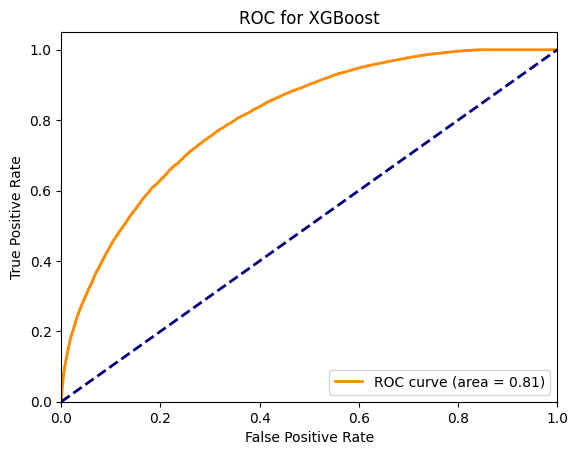

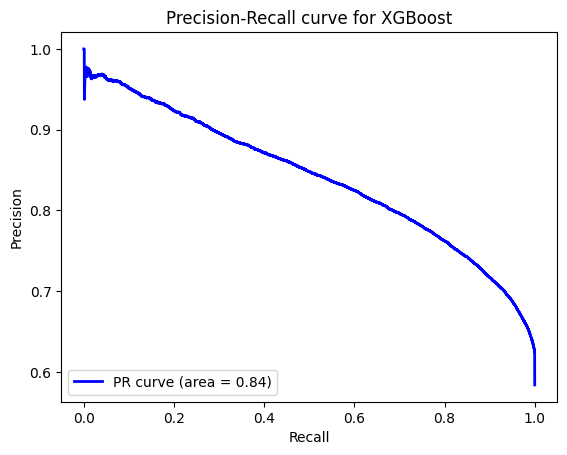

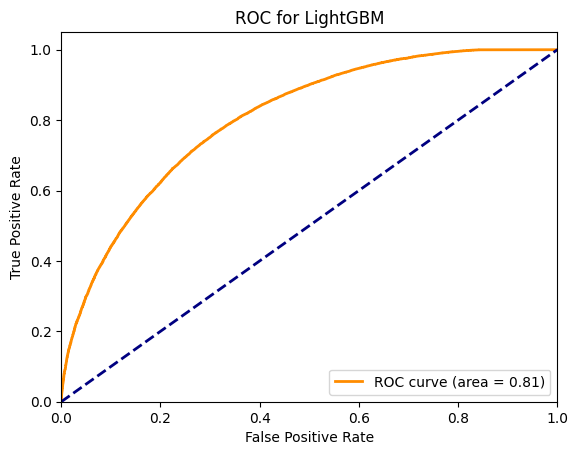

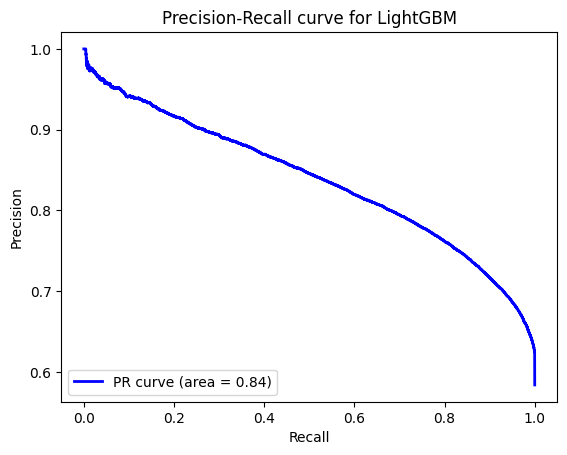

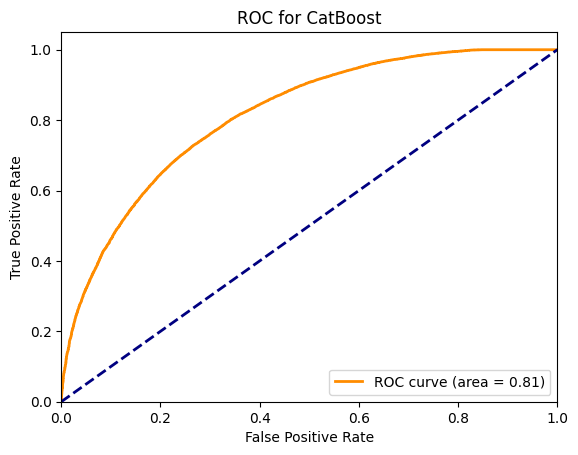

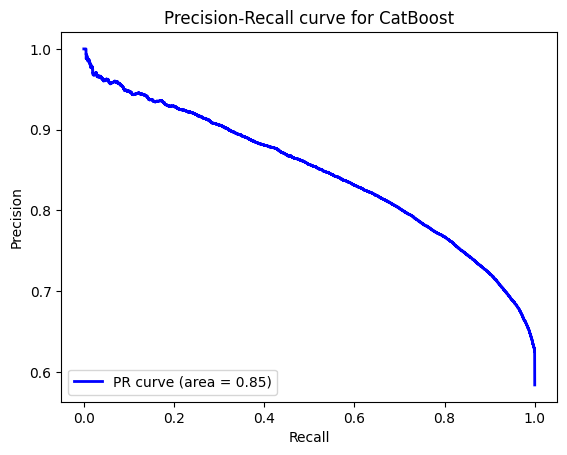

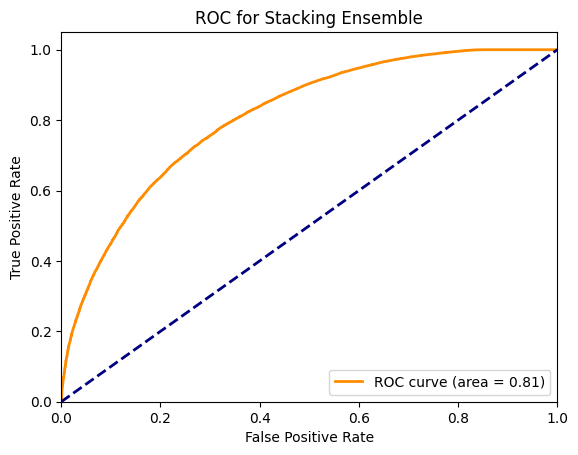

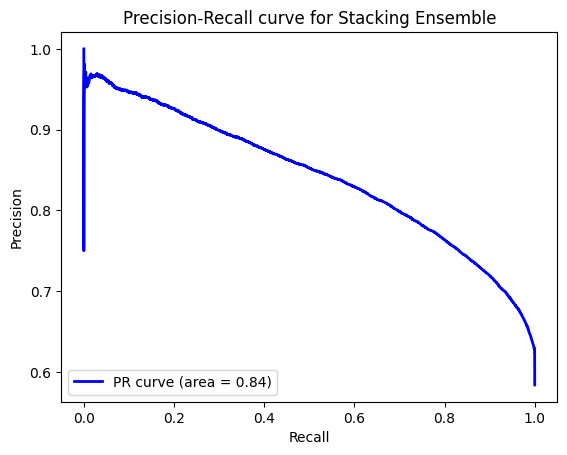

In [17]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import numpy as np

# Function to plot ROC Curve
def plot_roc_curve(y_true, y_scores, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC for {model_name}')
    plt.legend(loc="lower right")
    plt.show()

# Function to plot Precision-Recall Curve
def plot_precision_recall_curve(y_true, y_scores, model_name):
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    pr_auc = average_precision_score(y_true, y_scores)

    plt.figure()
    lw = 2
    plt.plot(recall, precision, color='blue', lw=lw, label='PR curve (area = %0.2f)' % pr_auc)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall curve for {model_name}')
    plt.legend(loc="lower left")
    plt.show()

xgb_val_probs = xgb_model.predict_proba(X_val_selected)[:, 1]
lgbm_val_probs = lgbm_model.predict_proba(X_val_selected)[:, 1]
catboost_val_probs = catboost_model.predict_proba(X_val_selected)[:, 1]
stacking_val_probs = stacking_model.predict_proba(X_val_selected)[:, 1]

# Plot ROC and PR curves for each model
plot_roc_curve(y_val, xgb_val_probs, "XGBoost")
plot_precision_recall_curve(y_val, xgb_val_probs, "XGBoost")

plot_roc_curve(y_val, lgbm_val_probs, "LightGBM")
plot_precision_recall_curve(y_val, lgbm_val_probs, "LightGBM")

plot_roc_curve(y_val, catboost_val_probs, "CatBoost")
plot_precision_recall_curve(y_val, catboost_val_probs, "CatBoost")

plot_roc_curve(y_val, stacking_val_probs, "Stacking Ensemble")
plot_precision_recall_curve(y_val, stacking_val_probs, "Stacking Ensemble")


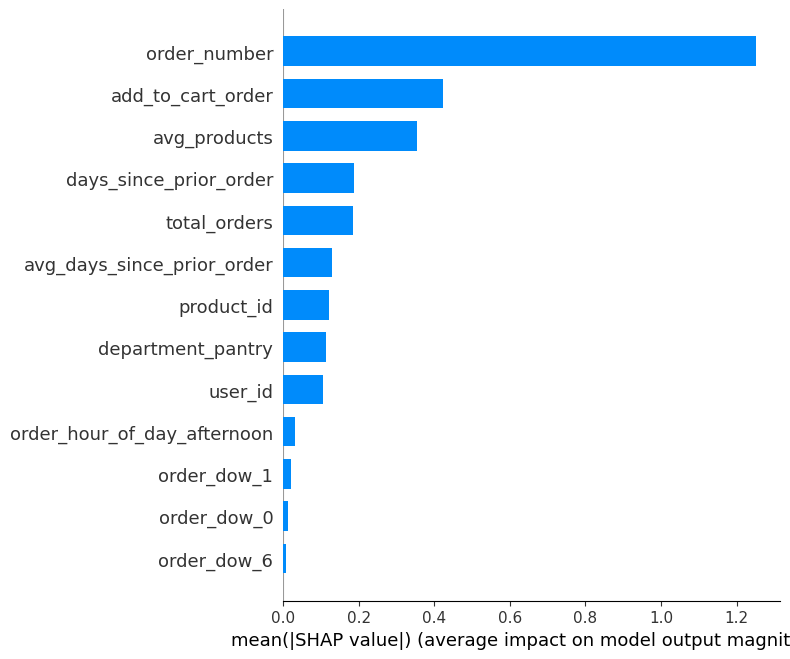

In [20]:
import shap

# Create the SHAP Explainer for XGBoost
xgb_explainer = shap.Explainer(xgb_model)
xgb_shap_values = xgb_explainer.shap_values(X_train_selected)

# Plot
shap.summary_plot(xgb_shap_values, X_train_selected, plot_type="bar")


LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


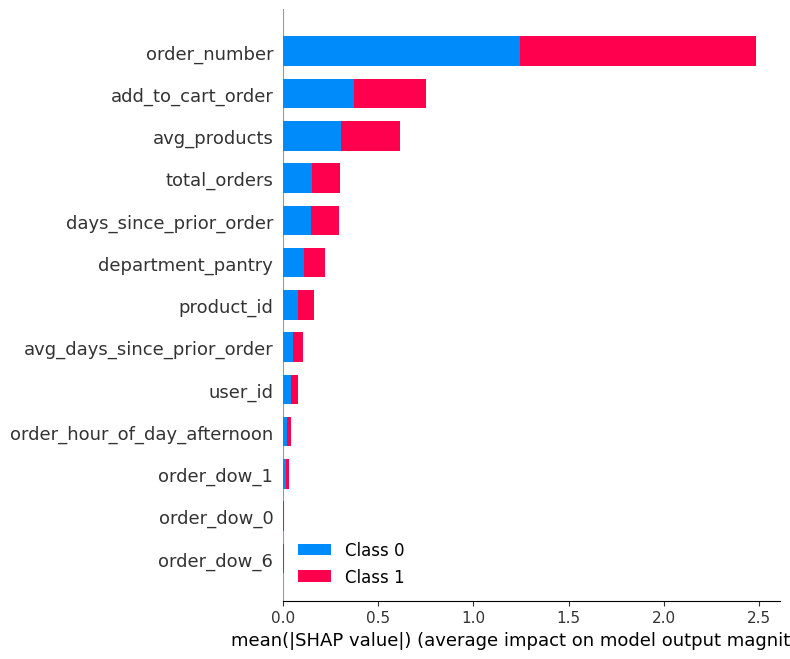

In [21]:
# Create the SHAP Explainer for LightGBM
lgbm_explainer = shap.Explainer(lgbm_model)
lgbm_shap_values = lgbm_explainer.shap_values(X_train_selected)

# Plot
shap.summary_plot(lgbm_shap_values, X_train_selected, plot_type="bar")


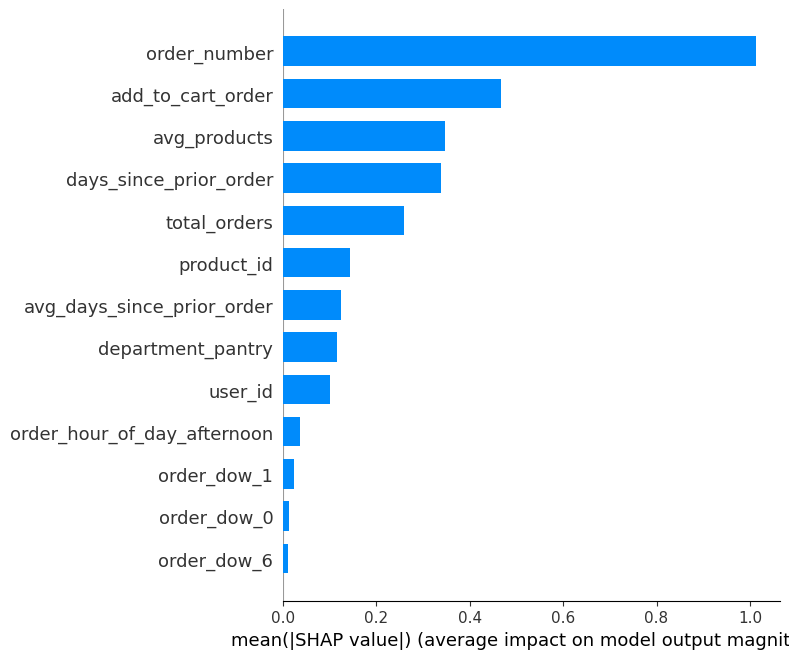

In [22]:
# Create the SHAP Explainer for CatBoost
catboost_explainer = shap.Explainer(catboost_model)
catboost_shap_values = catboost_explainer.shap_values(X_train_selected)

# Plot
shap.summary_plot(catboost_shap_values, X_train_selected, plot_type="bar")


In [29]:
from lime import lime_tabular
import numpy as np

# Create a LIME Tabular Explainer
explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train_selected),
    feature_names=X_train_selected.columns,
    class_names=['Negative', 'Positive'],
    mode='classification'
)

# Choose an instance to explain
instance_index = 1  # Change this to the index of the instance you want to explain
instance = X_val_selected.iloc[instance_index]

# Generate the explanation for the chosen instance
exp = explainer.explain_instance(
    data_row=instance,
    predict_fn=stacking_model.predict_proba
)

# Visualize the explanation
exp.show_in_notebook(show_table=True, show_all=False)


In [ ]:
import optuna
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

def objective(trial):
    # Hyperparameters to be tuned by Optuna
    param = {
        'iterations': trial.suggest_int('iterations', 50, 300),
        'depth': trial.suggest_int('depth', 4, 10),
        'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),
        'random_strength': trial.suggest_int('random_strength', 0, 100),
        'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),
        'od_type': trial.suggest_categorical('od_type', ['IncToDec', 'Iter'])
    }

    # TODO: add the train-test and run the model


In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

# Best hyperparameters
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)


In [ ]:
best_params = study.best_trial.params
best_model = CatBoostClassifier(**best_params, verbose=0)
best_model.fit(X_train_selected, y_train)
